In [25]:
import dd
import numpy as np
import matplotlib.pyplot as plt
from paperlib import pedshtf as pedshtf
from scipy.optimize import curve_fit
from sklearn.isotonic import IsotonicRegression
from rpsavgperf import rpsavgperf
from ipfnpytools.isotonic_regression import isotonic_regression
#
plt.style.use('helvet2')

#### Read the data
##### Edition 4 t=[3.0, 3.2]s
##### Edition 5 t=[4.9, 5.1]s
##### Edition 6 t=[5.5, 5.7]s

In [2]:
shotnr = 32233
#p1 = ppedshtf(shotnr=shotnr, exper='guimas', edition=1, nr_diags=4, elm_exper='AUGD')
#p2 = ppedshtf(shotnr=shotnr, exper='guimas', edition=3, nr_diags=4, elm_exper='AUGD')
p1 = pedshtf(shotnr=shotnr, exper='guimas', edition=4, nr_diags=4, elm_exper='AUGD')
p2 = pedshtf(shotnr=shotnr, exper='guimas', edition=5, nr_diags=4, elm_exper='AUGD')
p3 = pedshtf(shotnr=shotnr, exper='guimas', edition=6, nr_diags=4, elm_exper='AUGD')
pall = [p1, p2, p3]

/afs/ipp/aug/ads-diags/common/python/lib/dd.py:117: RuntimeWarning: Warning by DDcsgnl (8.1): no calibration of data
  warnings.warn(text.replace('\x00','').strip(), RuntimeWarning)
/afs/ipp/aug/ads-diags/common/python/lib/dd.py:117: RuntimeWarning: Warning by DDcsgrp (8.1): No PARAM_SET found
  warnings.warn(text.replace('\x00','').strip(), RuntimeWarning)
/afs/ipp/aug/ads-diags/common/python/lib/dd_20180216.py:117: RuntimeWarning: Warning by DDcsgnl (8.1): no calibration of data
  warnings.warn(text.replace('\x00','').strip(), RuntimeWarning)


#### Shifts

In [3]:
print(p1.neRshift)
print(p2.neRshift)
print(p2.neRshift)

[ 0.     0.     0.     0.006 -0.005 -0.     0.044  0.     0.     0.
  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.   ]
[ 0.     0.     0.     0.006 -0.005 -0.     0.044  0.     0.     0.
  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.   ]
[ 0.     0.     0.     0.006 -0.005 -0.     0.044  0.     0.     0.
  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.   ]


In [4]:
cutsl_low = [2.135, 2.135, 2.135]
cutsl_hi = [3.0, 3.0, 3.0]
cutsh_low = [2.12, 2.12, 2.12]
reflfsshift = np.array([0.0, 0.0, 0.0])
refhfsshift = np.array([0.0, 0.0, 0.0])
dotsizeref = 6
labels = [r'$\mathrm{TS_{edge}}$', 'LIN', 'Ref. LFS', 'Ref. HFS']

#### Average REF LFS profile P1

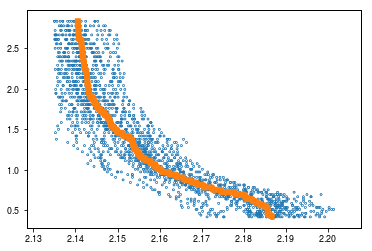

In [77]:
i=0
lrad = pall[i].rad[pall[i].indi[2]:pall[i].indf[2]]
ldens = pall[i].dens[pall[i].indi[2]:pall[i].indf[2]]*1e-19
lms = (lrad>cutsl_low[i])&(lrad<cutsl_hi[i])
plt.scatter(lrad[lms], ldens[lms], s=dotsizeref, zorder=1, label=labels[2], facecolors='none', edgecolors="C0", marker='o')

drl1 = isotonic_regression(lrad[lms], strict=True)
dnl1 = ldens[lms]

indstart = 5
indend = -16
rl1 = drl1[indstart:indend]
nl1 = dnl1[indstart:indend]

plt.plot(rl1, nl1, c='C1', lw=6)
plt.show()

#### Average REF HFS profile P1

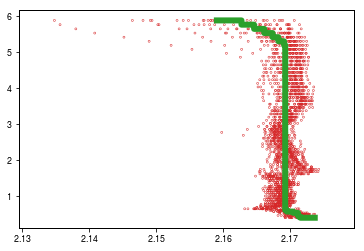

In [80]:
i=0
cutsh_hi = [3.0, 3.0, 3.0]

hrad = pall[i].rad[pall[i].indi[3]:pall[i].indf[3]]
hdens = pall[i].dens[pall[i].indi[3]:pall[i].indf[3]]*1e-19
hms = (hrad>cutsh_low[i])&(hrad<cutsh_hi[i])
plt.scatter(hrad[hms]+refhfsshift[i], hdens[hms], s=dotsizeref, zorder=1, label=labels[2], facecolors='none', edgecolors="C3", marker='o')

drh1 = isotonic_regression(hrad[hms], strict=False)
dnh1 = hdens[hms]

indstart = 0
indend = -1
rh1 = drh1[indstart:indend]
nh1 = dnh1[indstart:indend]

plt.plot(rh1, nh1, c='C2', lw=6)
plt.show()

#### Average REF LFS profile P2

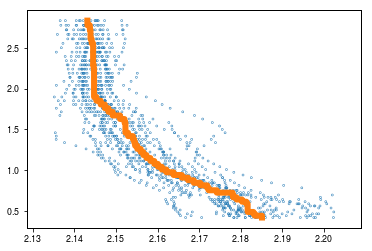

In [84]:
i=1
lrad = pall[i].rad[pall[i].indi[2]:pall[i].indf[2]]
ldens = pall[i].dens[pall[i].indi[2]:pall[i].indf[2]]*1e-19
lms = (lrad>cutsl_low[i])&(lrad<cutsl_hi[i])
plt.scatter(lrad[lms]+reflfsshift[i], ldens[lms], s=dotsizeref, zorder=1, label=labels[2], facecolors='none', edgecolors="C0", marker='o')

drl2 = isotonic_regression(lrad[lms])
dnl2 = ldens[lms]

indstart = 3
indend = -1
rl2 = drl2[indstart:indend]
nl2 = dnl2[indstart:indend]

plt.plot(rl2, nl2, c='C1', lw=6)
plt.show()

#### Average REF HFS profile P2

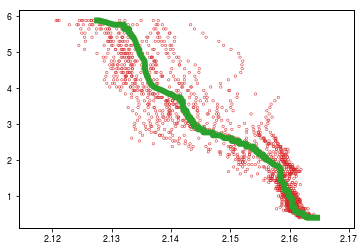

In [44]:
i=1
cutsh_hi = [3.0, 3.0, 3.0]

hrad = pall[i].rad[pall[i].indi[3]:pall[i].indf[3]]
hdens = pall[i].dens[pall[i].indi[3]:pall[i].indf[3]]*1e-19
hms = (hrad>cutsh_low[i])&(hrad<cutsh_hi[i])
plt.scatter(hrad[hms]+refhfsshift[i], hdens[hms], s=dotsizeref, zorder=1, label=labels[2], facecolors='none', edgecolors="C3", marker='o')

rh2 = isotonic_regression(hrad[hms])
nh2 = hdens[hms]

plt.plot(rh2, nh2, c='C2', lw=6)
plt.show()

#### Average REF LFS profile P3

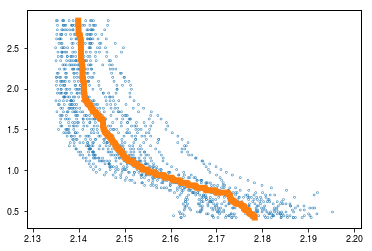

In [102]:
i=2
lrad = pall[i].rad[pall[i].indi[2]:pall[i].indf[2]]
ldens = pall[i].dens[pall[i].indi[2]:pall[i].indf[2]]*1e-19
lms = (lrad>cutsl_low[i])&(lrad<cutsl_hi[i])
plt.scatter(lrad[lms]+reflfsshift[i], ldens[lms], s=dotsizeref, zorder=1, label=labels[2], facecolors='none', edgecolors="C0", marker='o')

drl3 = isotonic_regression(lrad[lms])
dnl3 = ldens[lms]

indstart = 5
indend = -12
rl3 = drl3[indstart:indend]
nl3 = dnl3[indstart:indend]

plt.plot(rl3, nl3, c='C1', lw=6)
plt.show()

#### Average REF HFS profile P3

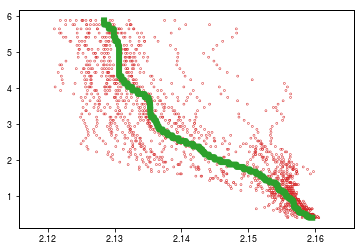

In [101]:
i=2
cutsh_hi = [3.0, 3.0, 3.0]

hrad = pall[i].rad[pall[i].indi[3]:pall[i].indf[3]]
hdens = pall[i].dens[pall[i].indi[3]:pall[i].indf[3]]*1e-19
hms = (hrad>cutsh_low[i])&(hrad<cutsh_hi[i])
plt.scatter(hrad[hms]+refhfsshift[i], hdens[hms], s=dotsizeref, zorder=1, label=labels[2], facecolors='none', edgecolors="C3", marker='o')

drh3 = isotonic_regression(hrad[hms])
dnh3 = hdens[hms]

indstart = 0
indend = -15
rh3 = drh3[indstart:indend]
nh3 = dnh3[indstart:indend]

plt.plot(rh3, nh3, c='C2', lw=6)
plt.show()

#### Concatenate data

In [103]:
ddnl = [nl1, nl2, nl3]
ddrl = [rl1, rl2, rl3]
ddnh = [nh1, nh2, nh3]
ddrh = [rh1, rh2, rh3]

#### Plots

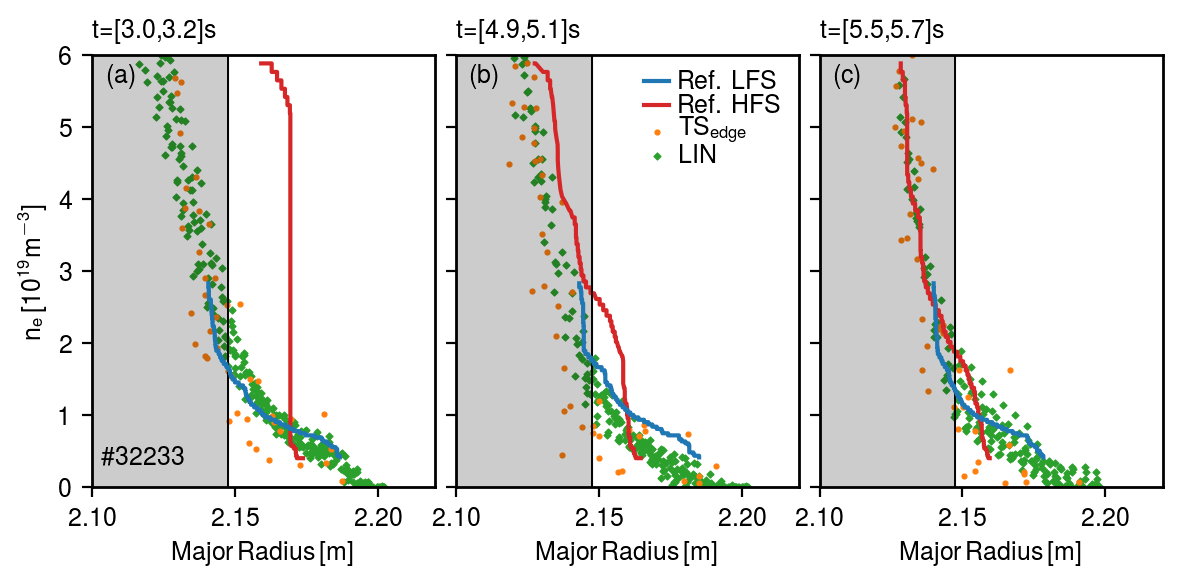

In [107]:
dotsize = 3
dotsizeref = 4
zorder = np.array([1,0,3,2])
labels = [r'$\mathrm{TS_{edge}}$', 'LIN', 'Ref. LFS', 'Ref. HFS']
framebox = [False, True]

textlabels= ['(a)','(b)','(c)']
fpgshift = [0.0,0.0,0.0]

#HFS shifts
### Shifts adjusted for the first time first time

### Shifts adjusted so (b) matches high gradie

#LFS shifts
#Original shifts compensated
#reflfsshift = np.array([p1.neRshift[5],p1.neRshift[5]])
reflfsshift = np.array([0.0,0.0,0.0])

fig, ax = plt.subplots(figsize=(6,3),ncols=3,nrows=1,sharey=True,dpi=200)

for i in range(len(textlabels)):

    #TS edge
    ax[i].scatter(pall[i].rad[pall[i].indi[0]:pall[i].indf[0]], pall[i].dens[pall[i].indi[0]:pall[i].indf[0]]*1e-19,
                  s=dotsize, zorder=zorder[0], label=labels[0],facecolors="C1", marker='o')
    #LIN
    ax[i].scatter(pall[i].rad[pall[i].indi[1]:pall[i].indf[1]], pall[i].dens[pall[i].indi[1]:pall[i].indf[1]]*1e-19,
                  s=dotsize, zorder=zorder[1], label=labels[1],facecolors='C2', marker='D')
    #Plot LFS ref
    ax[i].plot(ddrl[i], ddnl[i], zorder=zorder[2], label=labels[2], color="C0")
    #Clean up HFS ref
    ax[i].plot(ddrh[i], ddnh[i], zorder=zorder[3], label=labels[3], color="C3")
    
    #Separatrixes
    ax[i].axvline(pall[0].fpgavg+fpgshift[i], color='k', lw=0.7)
    ax[i].axvspan(2.1, pall[0].fpgavg+fpgshift[i], color='k', alpha=0.2)

    ax[i].set_xlabel(r'$\mathrm{Major\,Radius\,[m]}$')
    
    ax[i].set_ylim(0,6)
    ax[i].set_xlim(2.10,2.22)

    ax[i].set_title('t=[%0.1f,%0.1f]s'%(pall[i].t1,pall[i].t2), loc='left', fontsize=9)

    ax[i].set_xticks([2.10,2.15,2.20])
    ax[i].text(2.105,5.6,textlabels[i], color='k')

    #ax[i].legend(loc='upper right',borderpad=0.1,frameon=framebox[i],handletextpad=-0.3,labelspacing=0.1)

ax[1].legend(loc='upper right',borderpad=0.1,frameon=False,handletextpad=0.4,labelspacing=0.0,handlelength=1)
ax[0].set_ylabel(r'$\mathrm{n_e\,[10^{19}m^{-3}]}$')
ax[0].text(2.103, 0.3,'\#'+str(shotnr),color='k')
#
plt.tight_layout()
plt.subplots_adjust(wspace=0.06)
plt.savefig('Profiles/All_32233.png',dpi=300)
plt.show()

In [3]:
import dd
import numpy as np
import kk_abock
from getsig import getsig
from ddremoveELMData import *

class objview(object):
    def __init__(self, d):
        self.__dict__=d

def ppedshtf(shotnr=30554, exper='guimas', edition=3, nr_diags=4, elm_exper='AUGD'):
    
    ped = dd.shotfile('PED', shotnr, experiment='guimas', edition=edition)
    t1 = ped('t1')
    t2 = ped('t2')
    nedata = ped('neData')
    #mskz = nedata.data!=0.0
    rhos = nedata.area.data[0]#[0,mskz]
    dens = nedata.data#[mskz]
    diagind = ped('DiagIndx')
    nedpts = ped('neDPts')
    indexesr = nedpts.data[nedpts.data!=0]
    tstart = ped('tstart')
    tstop = ped('tstop')
    neRshift = ped('neRshift')
    ped.close()
    
    #Check the intervals
    indi = np.zeros(nr_diags).astype(int)
    indf = np.zeros(nr_diags).astype(int)
    #Initialize arrays
    indf[0] = np.array(indexesr[0]-1).astype(int)

    for i in range(1,nr_diags):
        indi[i] = np.sum(indexesr[0:i]).astype(int)
        indf[i] = np.sum(indexesr[0:i+1]).astype(int)-1
        
    #Gets the average separatrix position
    fpg = getsig(shotnr, 'FPG', 'Raus')
    fpgmsk = ddremoveELMData(shotnr, fpg.time, preft=0.002, suft=0.004, elm_exper=elm_exper)
    fpgind = (fpg.time>=t1.data)&(fpg.time<=t2.data)&fpgmsk
    fpgavg = np.mean(fpg.data[fpgind])
    
    import kk_abock
    eq = kk_abock.kk()
    eq.Open(shotnr, diag='FPP')
    radius = eq.rhopol_to_Rz((np.float(t1.data)+np.float(t2.data))/2.0, rhos, 0.0)
    rad = radius['R']
    eq.Close()
    
    return objview({'t1':np.array(t1.data),
                    't2':np.array(t2.data),
                    'rhos':np.array(rhos),
                    'rad':np.array(rad),
                    'dens':np.array(dens),
                    'indi':np.array(indi),
                    'indf':np.array(indf),
                    'neRshift':np.array(neRshift.data),
                    'fpgavg':np.array(fpgavg)})

In [6]:
pa = ppedshtf(shotnr=32233)

/afs/ipp/aug/ads-diags/common/python/lib/dd.py:117: RuntimeWarning: Warning by DDcsgnl (8.1): no calibration of data
  warnings.warn(text.replace('\x00','').strip(), RuntimeWarning)
/afs/ipp/aug/ads-diags/common/python/lib/dd.py:117: RuntimeWarning: Warning by DDcsgrp (8.1): No PARAM_SET found
  warnings.warn(text.replace('\x00','').strip(), RuntimeWarning)
/afs/ipp/aug/ads-diags/common/python/lib/dd_20180216.py:117: RuntimeWarning: Warning by DDcsgnl (8.1): no calibration of data
  warnings.warn(text.replace('\x00','').strip(), RuntimeWarning)


In [4]:
rhos = nedata.area.data[0]

NameError: name 'nedata' is not defined

In [50]:
a=pa.rhos[pa.rhos!=0]

In [12]:
pa.indf


array([  52,  246, 1546, 3100])

In [2]:
ped = dd.shotfile('PED', 32233, experiment='guimas', edition=3)
nedata = ped('neData')

/afs/ipp/aug/ads-diags/common/python/lib/dd.py:117: RuntimeWarning: Warning by DDcsgrp (8.1): No PARAM_SET found
  warnings.warn(text.replace('\x00','').strip(), RuntimeWarning)


In [3]:
nedata.data

array([3.2127557e+18, 3.1291496e+18, 2.1019614e+18, ..., 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00], dtype=float32)

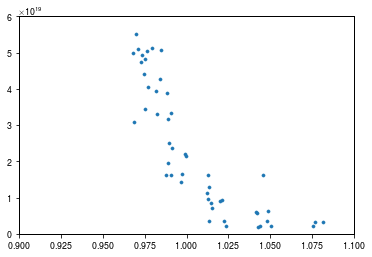

In [15]:


plt.scatter(pa.rhos[pa.indi[ind]:pa.indf[ind]], pa.dens[pa.indi[ind]:pa.indf[ind]],s=10)
plt.xlim(0.9,1.1)
plt.ylim(0,6e19)
plt.show()

In [10]:
len(pa.rhos)

32768

In [6]:
nedpts = ped('neDPts')

In [7]:
nedpts.data

array([   0.,    0.,    0.,   53.,  194., 1300., 1554.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.], dtype=float32)